In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#first we import the cleaned data
df = pd.read_csv('data_cleaned.csv')

In [73]:
#a look to the fist rows
df.head(20)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,yes,no_enrollment,Graduate,STEM,20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,no,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,4,47,0.0
2,11561,city_21,0.624,Male,no,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0.0
3,33241,city_115,0.789,Male,no,no_enrollment,Graduate,Business Degree,1,50-99,Pvt Ltd,0,52,1.0
4,666,city_162,0.767,Male,yes,no_enrollment,Masters,STEM,20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,Male,yes,Part time course,Graduate,STEM,11,50-99,Pvt Ltd,1,24,1.0
6,28806,city_160,0.920,Male,yes,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,yes,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,4,18,1.0
8,27107,city_103,0.920,Male,yes,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,Male,yes,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,4,123,0.0


In [74]:
#display the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  int64  
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  int64  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(4), object(8)
mem

In [75]:
#let's see the shape of the data
df.shape

(19158, 14)

In [76]:
#brief statistics of the data
df.describe()

,enrollee_id,city_development_index,experience,last_new_job,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,9.989456,1.806608,65.366896,0.249348
std,9616.292592,0.123362,6.480861,1.368069,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,1.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,1.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,3.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,4.000000,336.000000,1.000000


In [77]:
#look at the correlation between the numerical data
df[['city_development_index','experience', 'last_new_job','training_hours', 'target']].corr()

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.328716,0.192584,0.001920,-0.341665
experience,0.328716,1.000000,0.463859,0.001522,-0.174954
last_new_job,0.192584,0.463859,1.000000,-0.003826,-0.083445
training_hours,0.001920,0.001522,-0.003826,1.000000,-0.021577
target,-0.341665,-0.174954,-0.083445,-0.021577,1.000000


<AxesSubplot:>

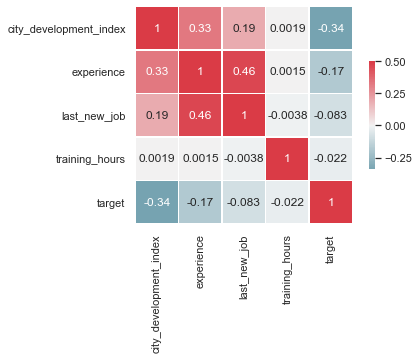

In [78]:
#we make a representative matrix
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['city_development_index','experience', 'last_new_job','training_hours', 'target']].corr(), vmax=0.5,center=0,
            cmap=cmap,annot=True, square=True, linewidths=0.5, cbar_kws={"shrink":0.5})

Text(0.5, 8.95999999999998, 'Training hours')

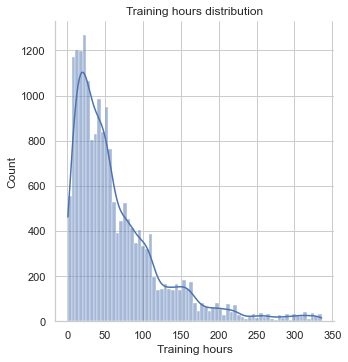

In [117]:
#our more relevent numeric data is trainig hours so lets see how is it distributed
sns.displot(data=df, x="training_hours", kde=True, color='b')
plt.title('Training hours distribution')
plt.xlabel('Training hours')

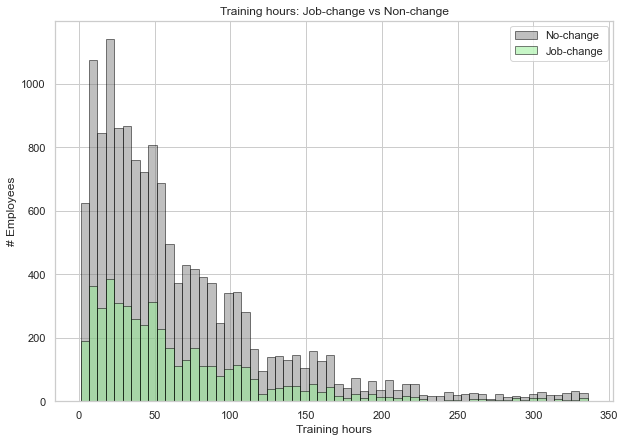

In [128]:
#let's see the distribution of training hours por emproyees interested in change job and the ones who aren't
plt.figure(figsize = (10,7))
plt.hist(df[df['target'] ==0].training_hours, bins = 60, label ='No-change', alpha = .50,edgecolor= 'black',color ='grey')
plt.hist(df[df['target']==1].training_hours, bins = 60, label = 'Job-change', alpha = .50, edgecolor = 'black',color = 'lightgreen')
plt.title('Training hours: Job-change vs Non-change')
plt.xlabel('Training hours')
plt.ylabel('# Employees')
plt.legend(loc = 'upper right')

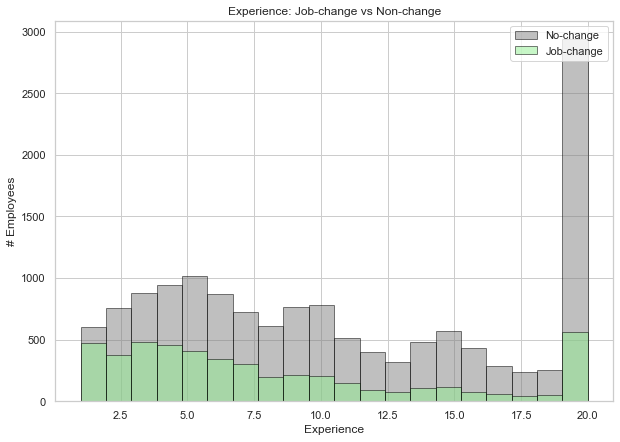

In [133]:
#let's do the same with the experience of employees
plt.figure(figsize = (10,7))
plt.hist(df[df['target'] ==0].experience, bins = 20, label ='No-change', alpha = .50,edgecolor= 'black',color ='grey')
plt.hist(df[df['target']==1].experience, bins = 20, label = 'Job-change', alpha = .50, edgecolor = 'black',color = 'lightgreen')
plt.title('Experience: Job-change vs Non-change')
plt.xlabel('Experience')
plt.ylabel('# Employees')
plt.legend(loc = 'upper right')

In [79]:
#lets see how many different categories in categorical data we have
for column in ['city','gender', 'relevent_experience','enrolled_university','education_level', 'major_discipline','company_size',
          'company_type', 'target']:
    print(df[column].value_counts())

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
Male      17729
Female     1238
Other       191
Name: gender, dtype: int64
yes    13792
no      5366
Name: relevent_experience, dtype: int64
no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
50-99        9021
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: in

In [80]:
#for better understanting let's plot this results
df_cat = df[['city','gender', 'relevent_experience','enrolled_university','education_level', 'major_discipline','company_size',
          'company_type', 'target']]
sns.set_theme(style="whitegrid")

graph for city: total = 123


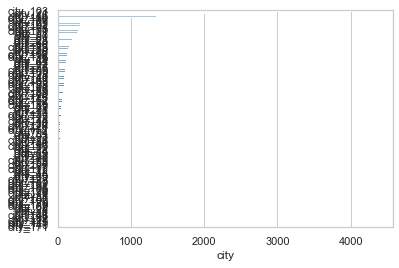

graph for gender: total = 3


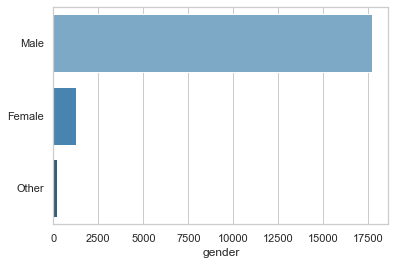

graph for relevent_experience: total = 2


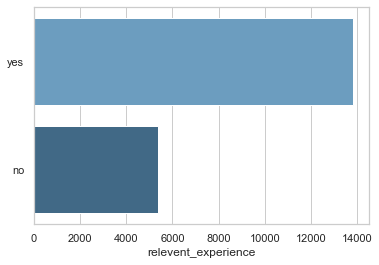

graph for enrolled_university: total = 3


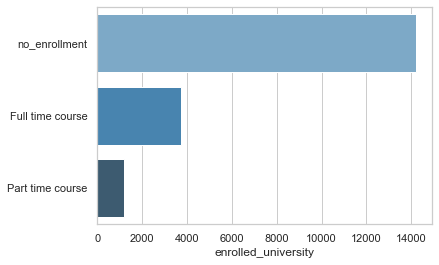

graph for education_level: total = 5


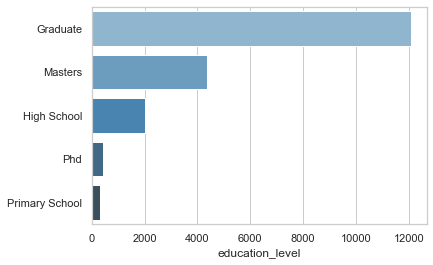

graph for major_discipline: total = 6


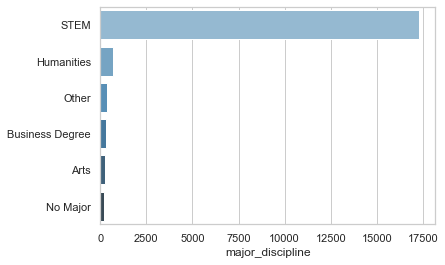

graph for company_size: total = 8


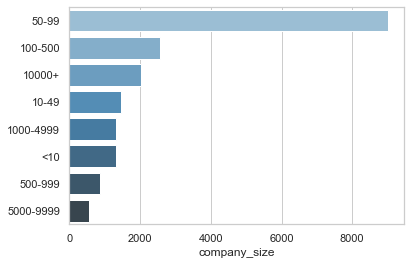

graph for company_type: total = 6


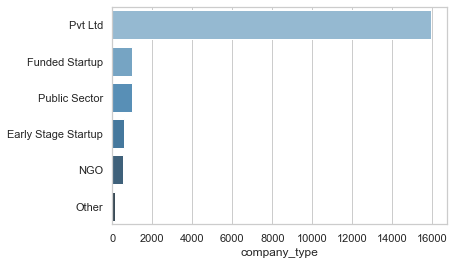

graph for target: total = 2


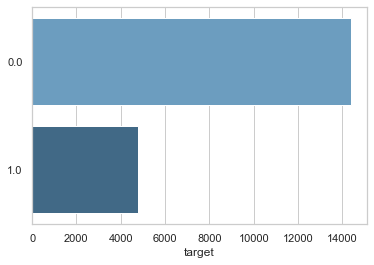

In [81]:
#make a barplot of numbers of apartments in each category
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num, y=cat_num.index, palette="Blues_d", orient='h')
    plt.show()

In [99]:
#let's group by to see how many employees wanna change job in each category
for column in df_cat.columns:
    print(df_cat.groupby([column,'target'])[column].count().unstack())

target      0.0   1.0
city                 
city_1     23.0   3.0
city_10    77.0   9.0
city_100  210.0  65.0
city_101   32.0  43.0
city_102  252.0  52.0
...         ...   ...
city_93    21.0   5.0
city_94    16.0  10.0
city_97    96.0   8.0
city_98    71.0   8.0
city_99    79.0  15.0

[123 rows x 2 columns]
target    0.0   1.0
gender             
Female    912   326
Male    13328  4401
Other     141    50
target                 0.0   1.0
relevent_experience             
no                    3550  1816
yes                  10831  2961
target                 0.0   1.0
enrolled_university             
Full time course      2326  1431
Part time course       896   302
no_enrollment        11159  3044
target            0.0   1.0
education_level            
Graduate         8709  3349
High School      1623   394
Masters          3426   935
Phd               356    58
Primary School    267    41
target              0.0   1.0
major_discipline             
Arts                200    53
Busines

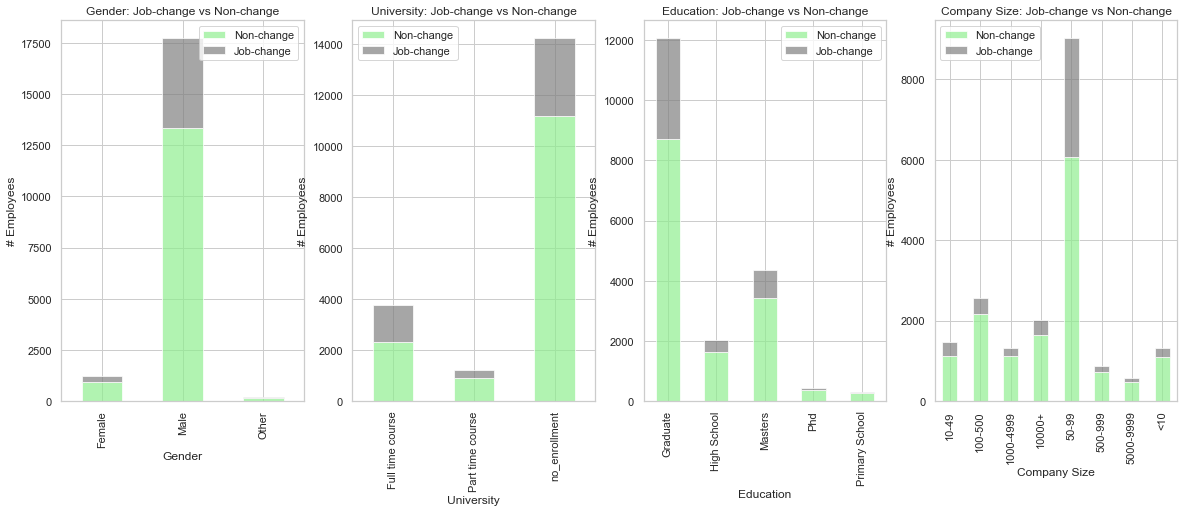

In [143]:
#let's group by target and each categorical column to se how many employees in each category ganna change job
f, axes = plt.subplots(1,4, figsize = (20,7))

gender = df_cat.groupby(['gender','target']).gender.count().unstack()
p1 = gender.plot(kind = 'bar', stacked = True, 
                   title = 'Gender: Job-change vs Non-change', 
                   color = ['lightgreen','grey'], alpha = .70, ax = axes[0])
p1.set_xlabel('Gender')
p1.set_ylabel('# Employees')
p1.legend(['Non-change','Job-change'])


university = df_cat.groupby(['enrolled_university','target']).enrolled_university.count().unstack()
p2 = university.plot(kind = 'bar', stacked = True, 
                    title = 'University: Job-change vs Non-change', 
                    color = ['lightgreen','grey'], alpha = .70, ax = axes[1])
p2.set_xlabel('University')
p2.set_ylabel('# Employees')
p2.legend(['Non-change','Job-change'])

education = df_cat.groupby(['education_level','target']).education_level.count().unstack()
p3 = education.plot(kind = 'bar', stacked = True,
                   title = 'Education: Job-change vs Non-change',
                   color = ['lightgreen','grey'], alpha = .70, ax = axes[2])
p3.set_xlabel('Education')
p3.set_ylabel('# Employees')
p3.legend(['Non-change','Job-change'])

companysize = df_cat.groupby(['company_size','target']).company_size.count().unstack()
p4 = companysize.plot(kind = 'bar', stacked = True,
                   title = 'Company Size: Job-change vs Non-change',
                   color = ['lightgreen','grey'], alpha = .70, ax = axes[3])
p4.set_xlabel('Company Size')
p4.set_ylabel('# Employees')
p4.legend(['Non-change','Job-change'])

plt.show()